In [23]:
!pip install -q tensorflow

In [33]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import seaborn as sns
import pandas as pd

In [35]:
tf.__version__

'2.18.0'

In [37]:
%load_ext tensorboard

In [67]:
logdir = 'log'

In [69]:
(train_images, train_label), (test_images, test_labes) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes = [0,1,2,3,4,5,6,7,8,9]

In [70]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (2,2), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (2,2), activation = 'relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [71]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [92]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x=train_images, y=train_label, epochs=5, validation_data=(test_images, test_labes))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9052 - loss: 0.3156 - val_accuracy: 0.9864 - val_loss: 0.0419
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9870 - loss: 0.0432 - val_accuracy: 0.9898 - val_loss: 0.0294
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9909 - loss: 0.0302 - val_accuracy: 0.9876 - val_loss: 0.0375
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9918 - loss: 0.0249 - val_accuracy: 0.9916 - val_loss: 0.0265
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9943 - loss: 0.0173 - val_accuracy: 0.9885 - val_loss: 0.0391


In [102]:
y_true = test_labes
y_pred=model.predict(test_images)
y_pred = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


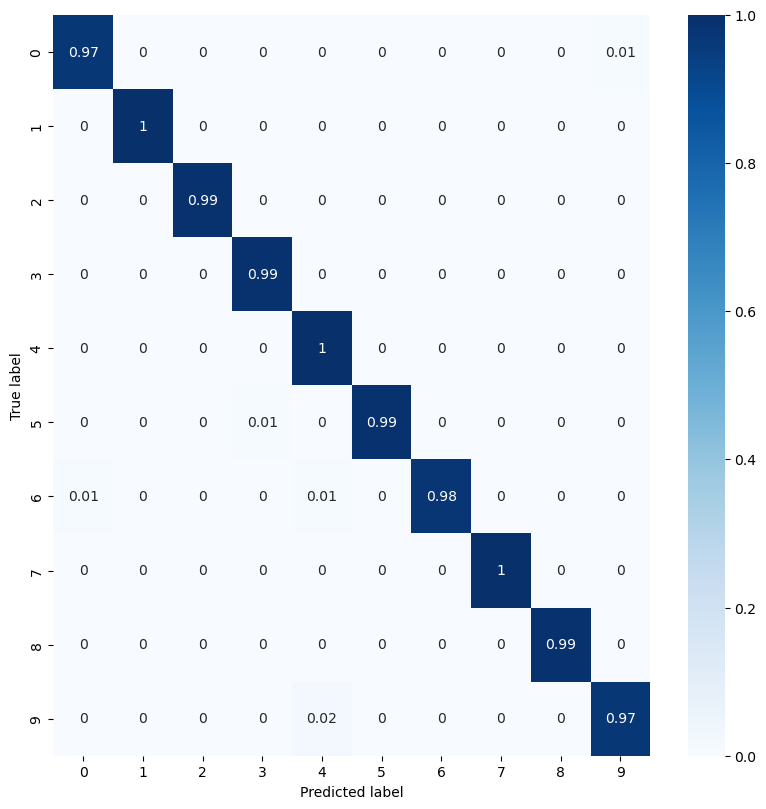

In [106]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions= y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm, index = classes, columns = classes)
figure = plt.figure(figsize=(8,8))
sns.heatmap(con_mat_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [151]:
VP = []
FN = []
FP = []
VN = []
for i in range(len(classes)):
    df = con_mat_df
    VP.append(con_mat_df._get_value(i, i))
    FN.append(round(con_mat_df.iloc[i].sum() - VP[i], 4))
    FP.append(round(con_mat_df.iloc[:, i].sum() - VP[i], 4))
    df = df.drop(i, axis = 0)
    df = df.drop(i, axis = 1)
    VN.append(round(df.sum().sum()))
print(VP, len(VP))
print(FN, len(FN))
print(FP, len(FP))
print(VN, len(VN))

[0.97, 1.0, 0.99, 0.99, 1.0, 0.99, 0.98, 1.0, 0.99, 0.97] 10
[0.01, 0.0, 0.0, 0.0, 0.0, 0.01, 0.02, 0.0, 0.0, 0.02] 10
[0.01, 0.0, 0.0, 0.01, 0.03, 0.0, 0.0, 0.0, 0.0, 0.01] 10
[9, 9, 9, 9, 9, 9, 9, 9, 9, 9] 10


In [157]:
for i in range(10):
    S = VP[i]/(VP[i] + FN[i])
    E = VN[i] / (FP[i] + VN[i])
    A = (VP[i] + VN[i]) / 10
    P = VP[i] / (VP[i] + FP[i])
    f_score = 2 * ((P * S) / (P + S))
    print(f"Sensibilidade: {round(S, 3)}, Especificidade {round(E, 3)}, Acuracia {round(A, 3)}, Precisão {round(P, 3)}, F-SCORE {round(f_score, 3)}")

Sensibilidade: 0.99, Especificidade 0.999, Acuracia 0.997, Precisão 0.99, F-SCORE 0.99
Sensibilidade: 1.0, Especificidade 1.0, Acuracia 1.0, Precisão 1.0, F-SCORE 1.0
Sensibilidade: 1.0, Especificidade 1.0, Acuracia 0.999, Precisão 1.0, F-SCORE 1.0
Sensibilidade: 1.0, Especificidade 0.999, Acuracia 0.999, Precisão 0.99, F-SCORE 0.995
Sensibilidade: 1.0, Especificidade 0.997, Acuracia 1.0, Precisão 0.971, F-SCORE 0.985
Sensibilidade: 0.99, Especificidade 1.0, Acuracia 0.999, Precisão 1.0, F-SCORE 0.995
Sensibilidade: 0.98, Especificidade 1.0, Acuracia 0.998, Precisão 1.0, F-SCORE 0.99
Sensibilidade: 1.0, Especificidade 1.0, Acuracia 1.0, Precisão 1.0, F-SCORE 1.0
Sensibilidade: 1.0, Especificidade 1.0, Acuracia 0.999, Precisão 1.0, F-SCORE 1.0
Sensibilidade: 0.98, Especificidade 0.999, Acuracia 0.997, Precisão 0.99, F-SCORE 0.985
